In [257]:
import pandas as pd
import numpy as np
import re
from math import ceil
from sklearn.metrics import mean_squared_error
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


In [258]:
TARGET = 'sales_quantity'         # Our main target


In [259]:
print('Load Main Data')

path= "/content/data.csv"

df = pd.read_csv( path , index_col=0)


Load Main Data


In [260]:
#info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878 entries, 0 to 1877
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     1878 non-null   object 
 1   item_number             1878 non-null   int64  
 2   item_name               1878 non-null   object 
 3   purchase_price          1878 non-null   float64
 4   suggested_retail_price  1878 non-null   float64
 5   orders_quantity         1878 non-null   float64
 6   sales_quantity          1878 non-null   float64
 7   revenue                 926 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 132.0+ KB


In [261]:
#drop duplicated data
df = df.drop_duplicates()
#sort values
df= df.sort_values('day').reset_index()

In [262]:
# Handle null values
df['revenue'] = df['revenue'].fillna(0)

#Feature engineering

In [263]:
# create a regular expression to match the weight and unit of each product
regex = r'(\d+)(G|KG)'

# extract the weight and unit using the regular expression
df['weight'] = df['item_name'].str.extract(regex, expand=False)[0].astype(int)
df['unit'] = df['item_name'].str.extract(regex, expand=False)[1]
# Perform one-hot encoding
one_hot = pd.get_dummies(df['unit'], prefix='unit')
df = pd.concat([df, one_hot], axis=1)


In [264]:
#sales price
df['sales_price'] = df['revenue']/df['sales_quantity']
#handle nan value in sales price
df['sales_price'] = df['sales_price'].fillna(df['suggested_retail_price'])
#Orders quantity at the beginnin of the day
df['orders_quantity'] = df[['orders_quantity', 'sales_quantity']].max(axis=1)
# quantity at the end of the day
df['end_quantity'] = df['orders_quantity']-df['sales_quantity']
# discount
df['discount'] = (df['sales_price']-df['suggested_retail_price'])/df['suggested_retail_price']*100

In [265]:
# We can do some basic aggregations
df['price_max'] = df.groupby(['item_number'])['sales_price'].transform('max')
df['price_min'] = df.groupby(['item_number'])['sales_price'].transform('min')
df['price_std'] = df.groupby(['item_number'])['sales_price'].transform('std')
df['price_mean'] = df.groupby(['item_number'])['sales_price'].transform('mean')

In [266]:
# Convert to DateTime
df['date'] = pd.to_datetime(df['day'])

# Make some features from date
df['tm_d'] = df['date'].dt.day.astype(np.int8)
df['tm_w'] = df['date'].dt.week.astype(np.int8)
df['tm_m'] = df['date'].dt.month.astype(np.int8)
df['tm_y'] = df['date'].dt.year
df['tm_y'] = (df['tm_y'] - df['tm_y'].min()).astype(np.int8)

df['tm_dw'] = df['date'].dt.dayofweek.astype(np.int8) 
df['tm_w_end'] = (df['tm_dw']>=5).astype(np.int8)

<ipython-input-266-34b5d8578f3b>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['tm_w'] = df['date'].dt.week.astype(np.int8)


# Analysis
## the Following analysis show use the correlation between the variable and justifie the need of feature engineering

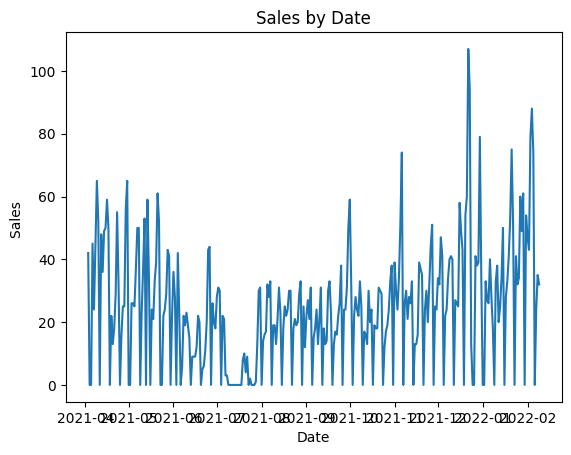

In [267]:
# aggregate sales 

# group the data by date and sum the sales amounts for each date
sales_by_date = df.groupby('date')['sales_quantity'].sum()

# plot the sales data as a line graph
plt.plot(sales_by_date.index, sales_by_date.values)

# add x and y axis labels
plt.xlabel('Date')
plt.ylabel('Sales ')

# add a title to the graph
plt.title('Sales by Date')

# display the graph
plt.show()


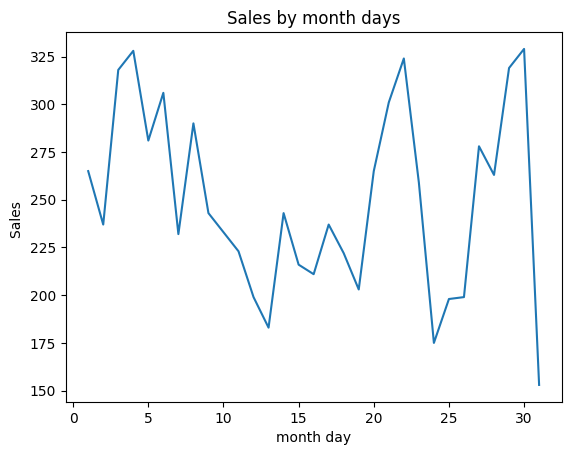

In [268]:
sales_by_date = df.groupby('tm_d')['sales_quantity'].sum()

# plot the sales data as a line graph
plt.plot(sales_by_date.index, sales_by_date.values)

# add x and y axis labels
plt.xlabel('month day')
plt.ylabel('Sales ')

# add a title to the graph
plt.title('Sales by month days')

# display the graph
plt.show()


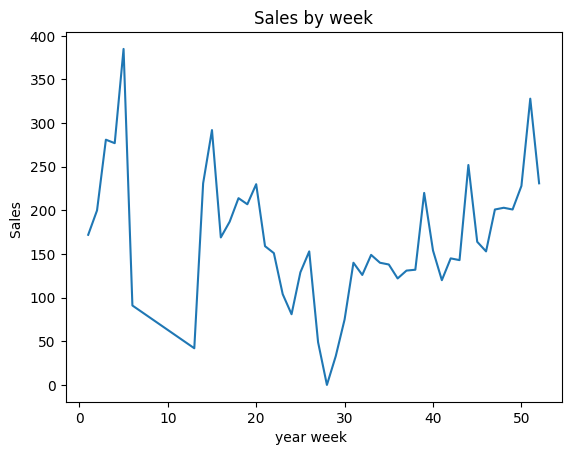

In [269]:
sales_by_date = df.groupby('tm_w')['sales_quantity'].sum()

# plot the sales data as a line graph
plt.plot(sales_by_date.index, sales_by_date.values)

# add x and y axis labels
plt.xlabel('year week ')
plt.ylabel('Sales ')

# add a title to the graph
plt.title('Sales by week')

# display the graph
plt.show()


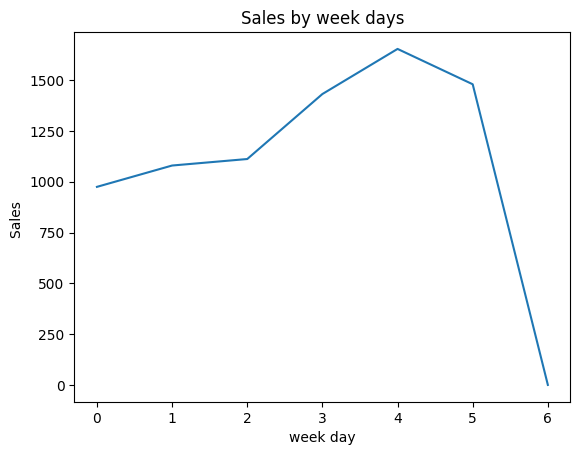

In [270]:
sales_by_date = df.groupby('tm_dw')['sales_quantity'].sum()

# plot the sales data as a line graph
plt.plot(sales_by_date.index, sales_by_date.values)

# add x and y axis labels
plt.xlabel('week day')
plt.ylabel('Sales ')

# add a title to the graph
plt.title('Sales by week days')

# display the graph
plt.show()


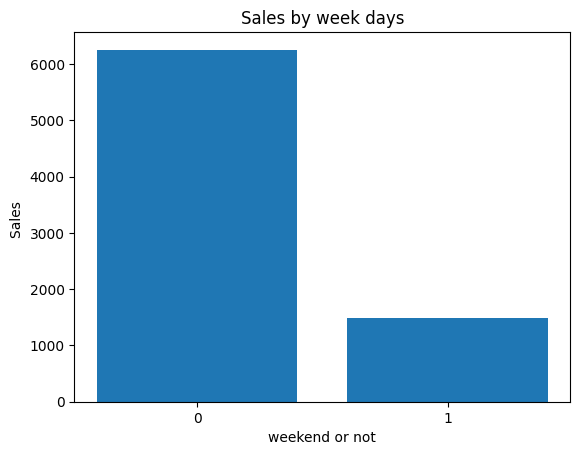

In [271]:

sales_by_date = df.groupby('tm_w_end')['sales_quantity'].sum()

# plot the sales data as a line graph
plt.bar(sales_by_date.index, sales_by_date.values)

# add x and y axis labels
plt.xlabel('weekend or not')
plt.ylabel('Sales ')
new_list = range(0,2)
plt.xticks(new_list)
# add a title to the graph
plt.title('Sales by week days')

# display the graph
plt.show()


# Correlation 

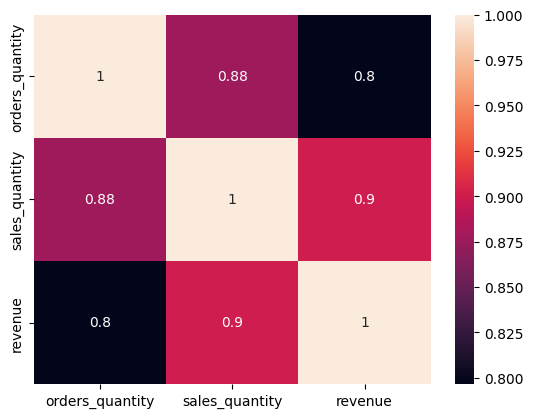

In [272]:
# calculate the correlation matrix between variables : orders_quantity &	sales_quantity &	revenue
corr_matrix = df[["orders_quantity",	"sales_quantity",	"revenue" ]].corr()

# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True)

# display the heatmap
plt.show()


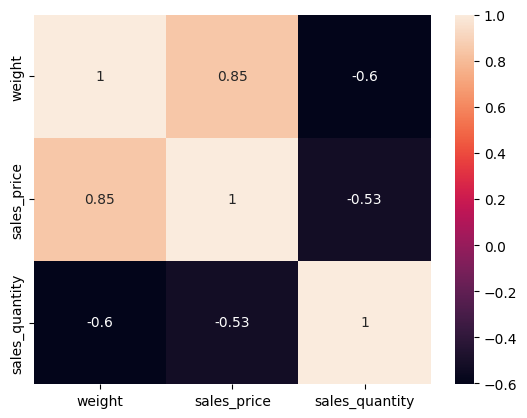

In [273]:
# calculate the correlation matrix between variable
corr_matrix = df[["weight","sales_price","sales_quantity" ]].corr()

# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True)

# display the heatmap
plt.show()
